In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore") 

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df = train_df.append(test_df , ignore_index = True)

In [7]:
quan = list( test_df.loc[:,test_df.dtypes != 'object'].drop('Id',axis=1).columns.values )
qual = list( test_df.loc[:,test_df.dtypes == 'object'].columns.values )

In [8]:
hasNAN = df[quan].isnull().sum()
hasNAN = hasNAN[hasNAN > 0]
hasNAN = hasNAN.sort_values(ascending=False)
print(hasNAN)
print()
print()
hasNAN = df[qual].isnull().sum()
hasNAN = hasNAN[hasNAN > 0]
hasNAN = hasNAN.sort_values(ascending=False)
print(hasNAN)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
dtype: int64


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [9]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
df.GarageYrBlt.fillna(0, inplace=True)
df.MasVnrArea.fillna(0, inplace=True)    
df.BsmtHalfBath.fillna(0, inplace=True)
df.BsmtFullBath.fillna(0, inplace=True)
df.GarageArea.fillna(0, inplace=True)
df.GarageCars.fillna(0, inplace=True)    
df.TotalBsmtSF.fillna(0, inplace=True)   
df.BsmtUnfSF.fillna(0, inplace=True)     
df.BsmtFinSF2.fillna(0, inplace=True)    
df.BsmtFinSF1.fillna(0, inplace=True)    
# Filling missing values for categorical features
df.PoolQC.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)    
df.Alley.fillna('NA', inplace=True)          
df.Fence.fillna('NA', inplace=True)         
df.FireplaceQu.fillna('NA', inplace=True)    
df.GarageCond.fillna('NA', inplace=True)    
df.GarageQual.fillna('NA', inplace=True)     
df.GarageFinish.fillna('NA', inplace=True)   
df.GarageType.fillna('NA', inplace=True)     
df.BsmtExposure.fillna('NA', inplace=True)     
df.BsmtCond.fillna('NA', inplace=True)        
df.BsmtQual.fillna('NA', inplace=True)        
df.BsmtFinType2.fillna('NA', inplace=True)     
df.BsmtFinType1.fillna('NA', inplace=True)     
df.MasVnrType.fillna('None', inplace=True)   
df.Exterior2nd.fillna('None', inplace=True) 
# These are general properties that all houses should have, so NANs probably 
# just mean the values were not recorded. I therefore use "mode", the most 
# common value to fill in
df.Functional.fillna(df.Functional.mode()[0], inplace=True)       
df.Utilities.fillna(df.Utilities.mode()[0], inplace=True)          
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)        
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)                
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)        
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)    
# MSZoning should highly correlate with the location, so I use the mode values of individual 
# Neighborhoods
for i in df.Neighborhood.unique():
    if df.MSZoning[df.Neighborhood == i].isnull().sum() > 0:
        df.loc[df.Neighborhood == i,'MSZoning'] = \
        df.loc[df.Neighborhood == i,'MSZoning'].fillna(df.loc[df.Neighborhood == i,'MSZoning'].mode()[0]) 
# These categorical features are "rank", so they can be transformed to 
# numerical features
df.Alley = df.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

# Update my lists of numerical and categorical features
newquan = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
           'ExterCond','ExterQual','FireplaceQu','Functional','GarageCond',
           'GarageQual','HeatingQC','KitchenQual','LandSlope','PavedDrive','PoolQC',
           'Street','Utilities']
quan = quan + newquan 
for i in newquan: qual.remove(i)


# This is actually a categorical feature
df.MSSubClass = df.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
                                   50:'class5', 60:'class6', 70:'class7', 75:'class8',
                                   80:'class9', 85:'class10', 90:'class11', 120:'class12',
                                   150:'class13', 160:'class14', 180:'class15', 190:'class16'})

# Keeping "YrSold" is enough
df=df.drop('MoSold',axis=1)

# Update my lists of numerical and categorical features
quan.remove('MoSold')
quan.remove('MSSubClass')
qual.append('MSSubClass')

df['Age'] = df.YrSold - df.YearBuilt
df['AgeRemod'] = df.YrSold - df.YearRemodAdd
df['AgeGarage'] = df.YrSold - df.GarageYrBlt

# For the houses without a Garage, I filled the NANs with zeros, which makes AgeGarage ~ 2000
# Here I replace their AgeGarage with the maximum value among the houses with Garages
max_AgeGarage = np.max(df.AgeGarage[df.AgeGarage < 1000])
df['AgeGarage'] = df['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

# Some of the values are negative because the work was done after the house 
# was sold. In these cases, I change them to zero to avoid negative ages.
df.Age = df.Age.map(lambda x: 0 if x < 0 else x)
df.AgeRemod = df.AgeRemod.map(lambda x: 0 if x < 0 else x)
df.AgeGarage = df.AgeGarage.map(lambda x: 0 if x < 0 else x)

# drop the original time variables 
df=df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

# update my list of numerical feature
for i in ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']: quan.remove(i)
quan = quan + ['Age','AgeRemod','AgeGarage']



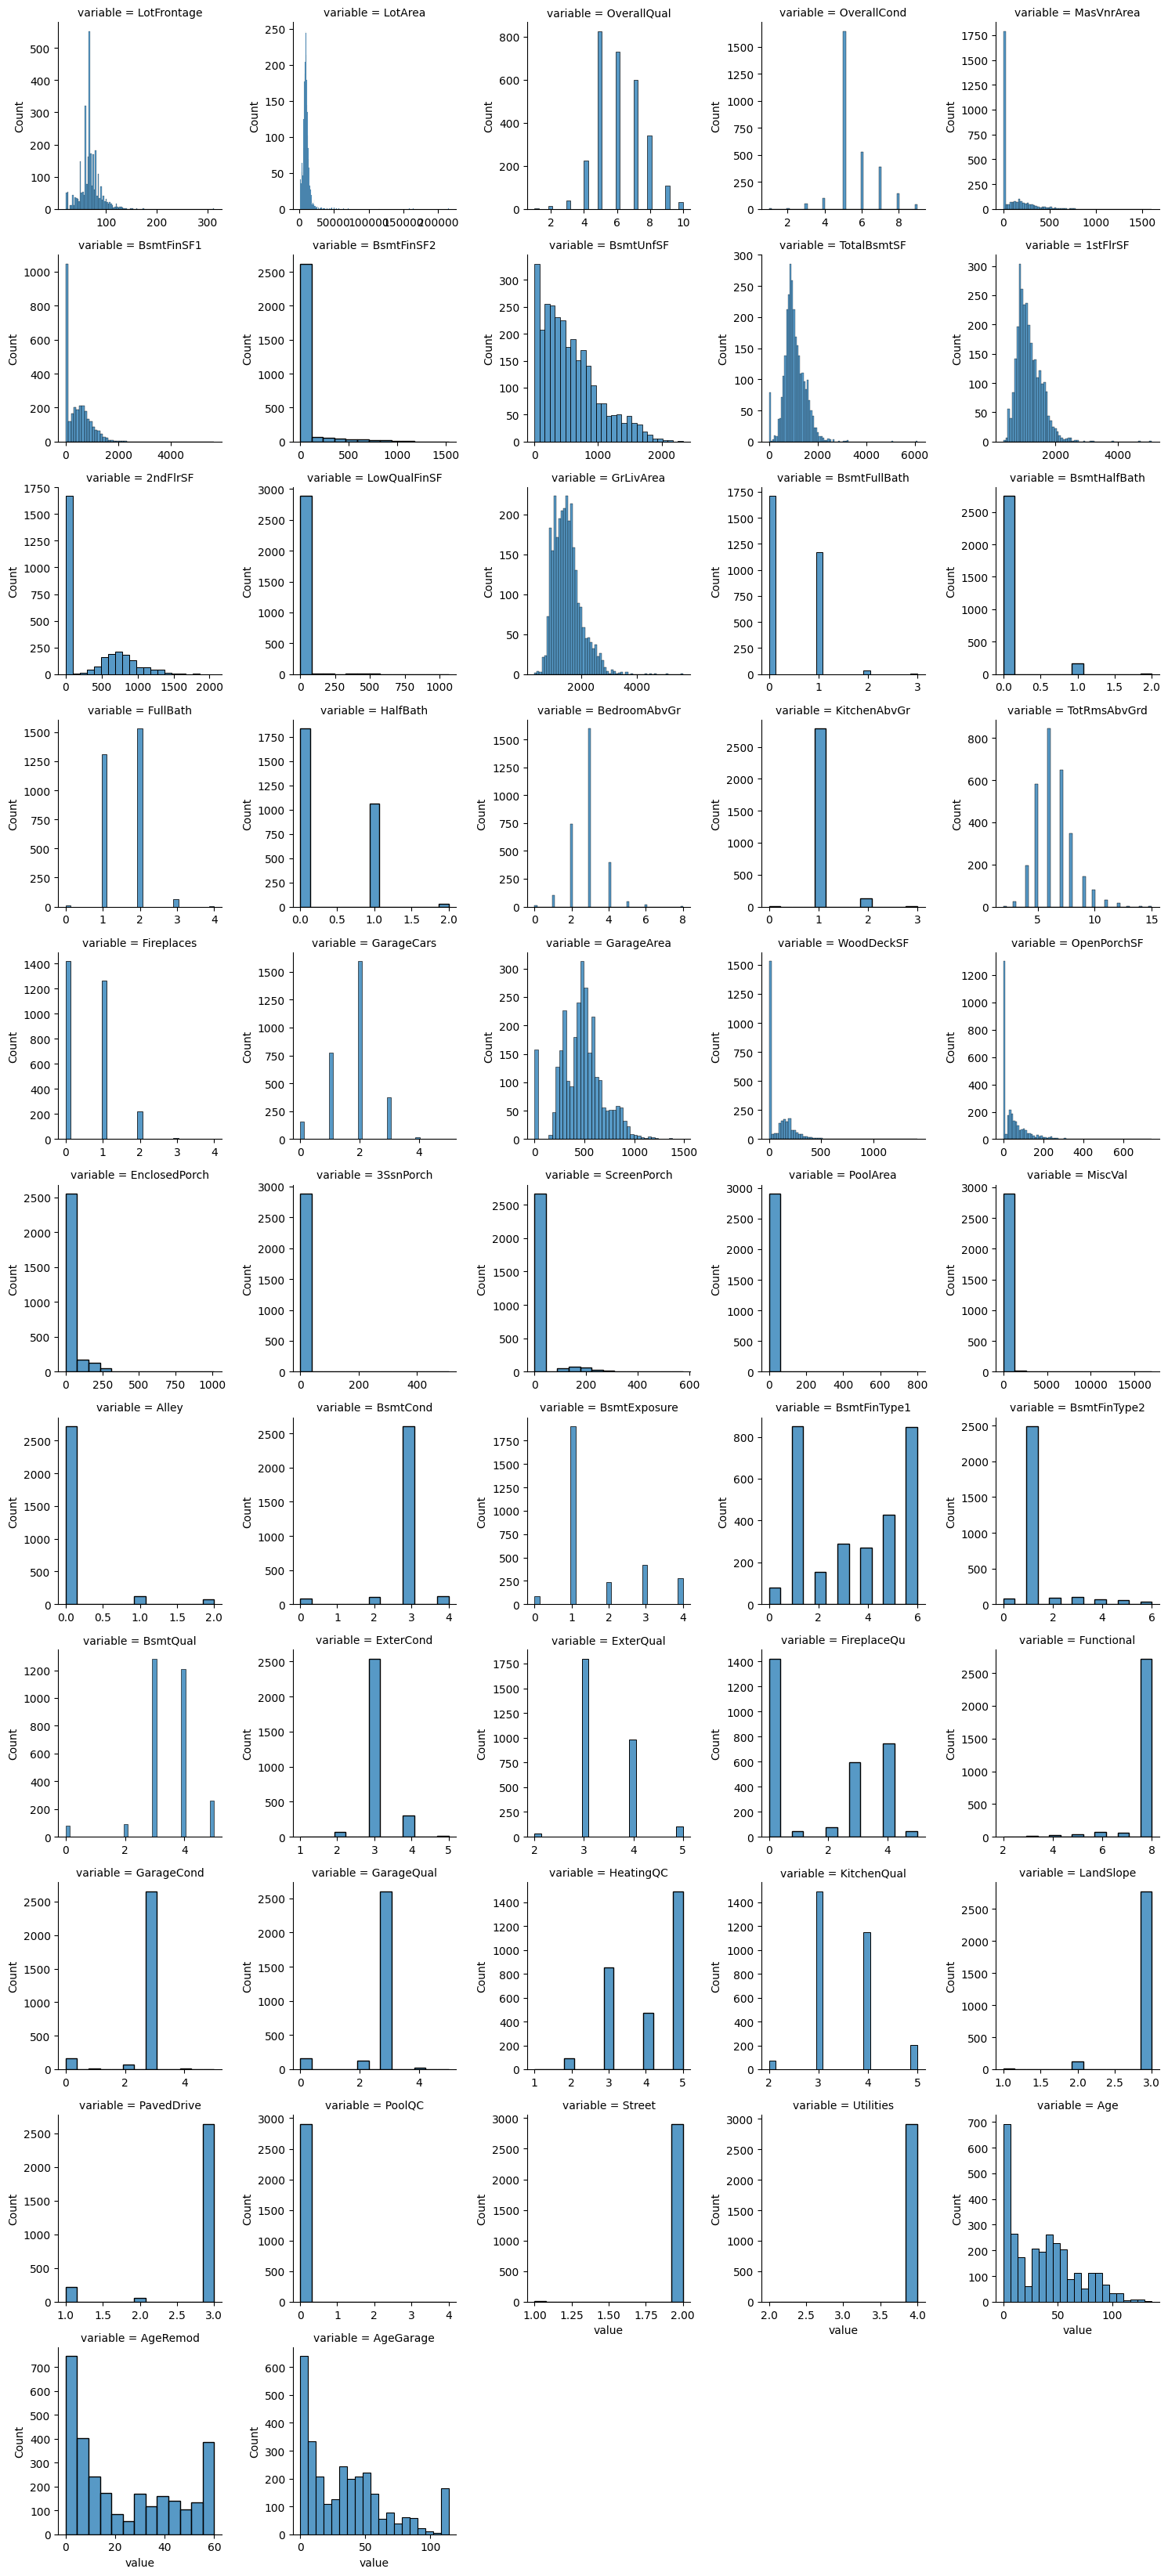

In [10]:
temp = pd.melt(df.drop('SalePrice', axis=1), value_vars=quan)

grid = sns.FacetGrid(temp, col="variable", col_wrap=5, height=3.0, 
                     aspect=1.0, sharex=False, sharey=False)

grid.map(sns.histplot, "value")
plt.show()

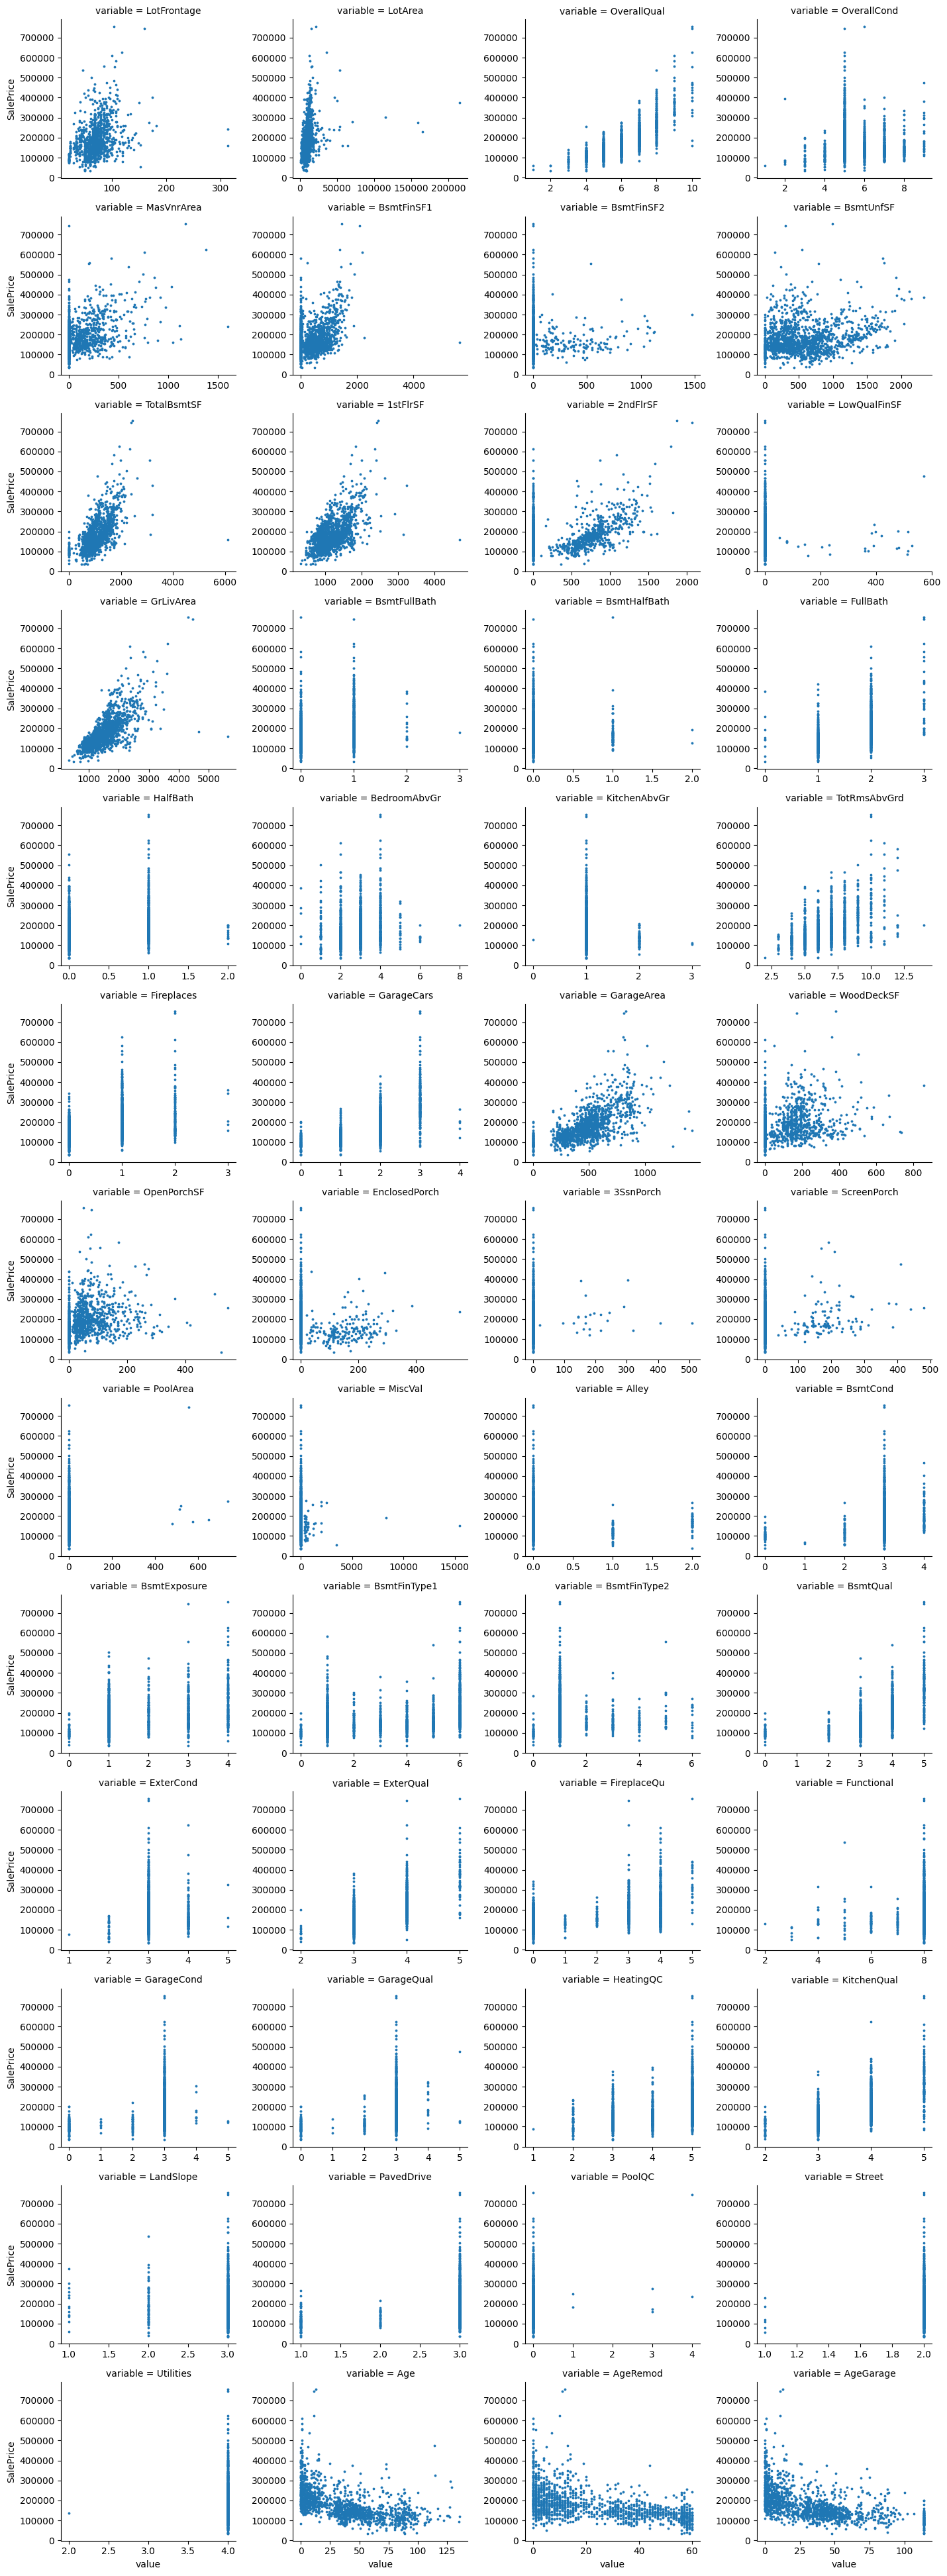

In [11]:
temp = pd.melt(df, id_vars=['SalePrice'], value_vars=quan)
grid = sns.FacetGrid(temp, col="variable", col_wrap=4, height=3.0, 
                     aspect=1.2, sharex=False, sharey=False)
grid.map(plt.scatter, "value", 'SalePrice', s=3)
plt.show()

In [12]:
index_drop = df.LotFrontage[df.LotFrontage > 300].index
index_drop = np.append(index_drop, df.LotArea[df.LotArea > 100000].index)
index_drop = np.append(index_drop, df.BsmtFinSF1[df.BsmtFinSF1 > 4000].index)
index_drop = np.append(index_drop, df.TotalBsmtSF[df.TotalBsmtSF > 6000].index)
index_drop = np.append(index_drop, df['1stFlrSF'][df['1stFlrSF'] > 4000].index)
index_drop = np.append(index_drop, df.GrLivArea[(df.GrLivArea > 4000) & (df.SalePrice < 13)].index)
index_drop = np.unique(index_drop)
# make sure we only remove data from the training set
index_drop = index_drop[index_drop < 1460] 
df = df.drop(index_drop).reset_index(drop=True)

In [13]:
for i in quan:
    print(i+': {}'.format(round(skew(df[i]),2)))

LotFrontage: 0.76
LotArea: 3.6
OverallQual: 0.19
OverallCond: 0.57
MasVnrArea: 2.62
BsmtFinSF1: 1.0
BsmtFinSF2: 4.16
BsmtUnfSF: 0.92
TotalBsmtSF: 0.7
1stFlrSF: 1.29
2ndFlrSF: 0.86
LowQualFinSF: 12.08
GrLivArea: 1.13
BsmtFullBath: 0.62
BsmtHalfBath: 3.94
FullBath: 0.17
HalfBath: 0.69
BedroomAbvGr: 0.33
KitchenAbvGr: 4.3
TotRmsAbvGrd: 0.75
Fireplaces: 0.73
GarageCars: -0.22
GarageArea: 0.22
WoodDeckSF: 1.84
OpenPorchSF: 2.54
EnclosedPorch: 4.0
3SsnPorch: 11.36
ScreenPorch: 3.94
PoolArea: 17.68
MiscVal: 21.95
Alley: 4.13
BsmtCond: -3.6
BsmtExposure: 1.12
BsmtFinType1: -0.15
BsmtFinType2: 3.16
BsmtQual: -1.27
ExterCond: 1.31
ExterQual: 0.78
FireplaceQu: 0.18
Functional: -4.96
GarageCond: -3.38
GarageQual: -3.26
HeatingQC: -0.55
KitchenQual: 0.44
LandSlope: -4.98
PavedDrive: -2.98
PoolQC: 20.33
Street: -16.18
Utilities: -53.94
Age: 0.6
AgeRemod: 0.45
AgeGarage: 0.97


In [14]:
skewed_features = np.array(quan)[np.abs(skew(df[quan])) > 0.5]
df[skewed_features] = np.log1p(df[skewed_features])

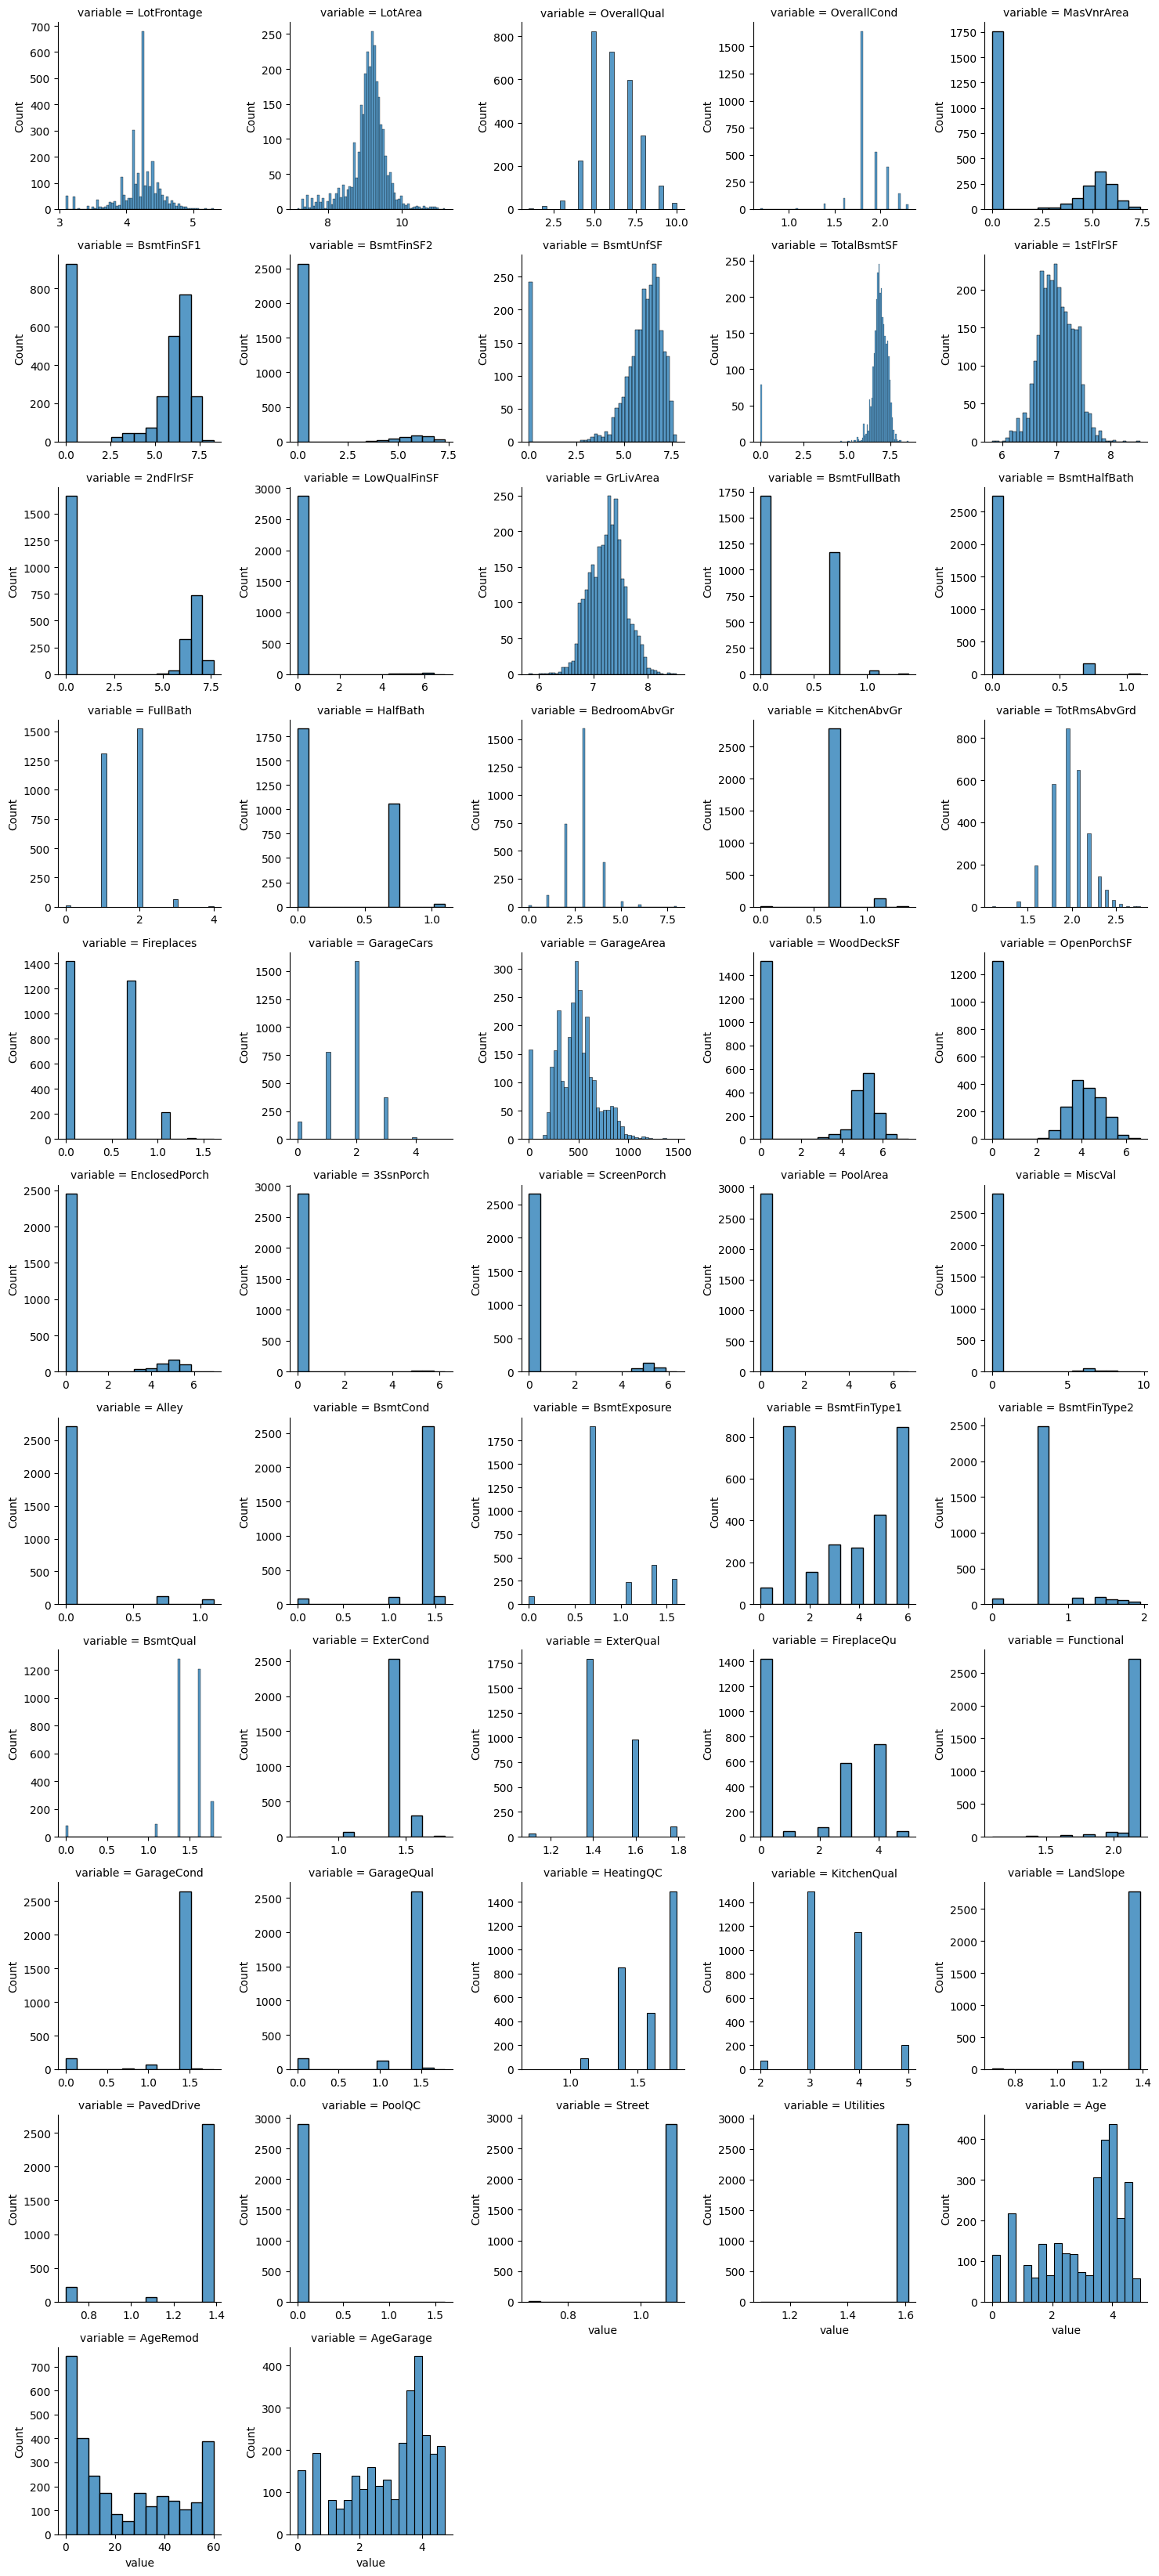

In [15]:
temp = pd.melt(df, value_vars=quan)
grid = sns.FacetGrid(temp, col="variable", col_wrap=5, height=3.0, 
                     aspect=1.0, sharex=False, sharey=False)
grid.map(sns.histplot, "value")
plt.show()

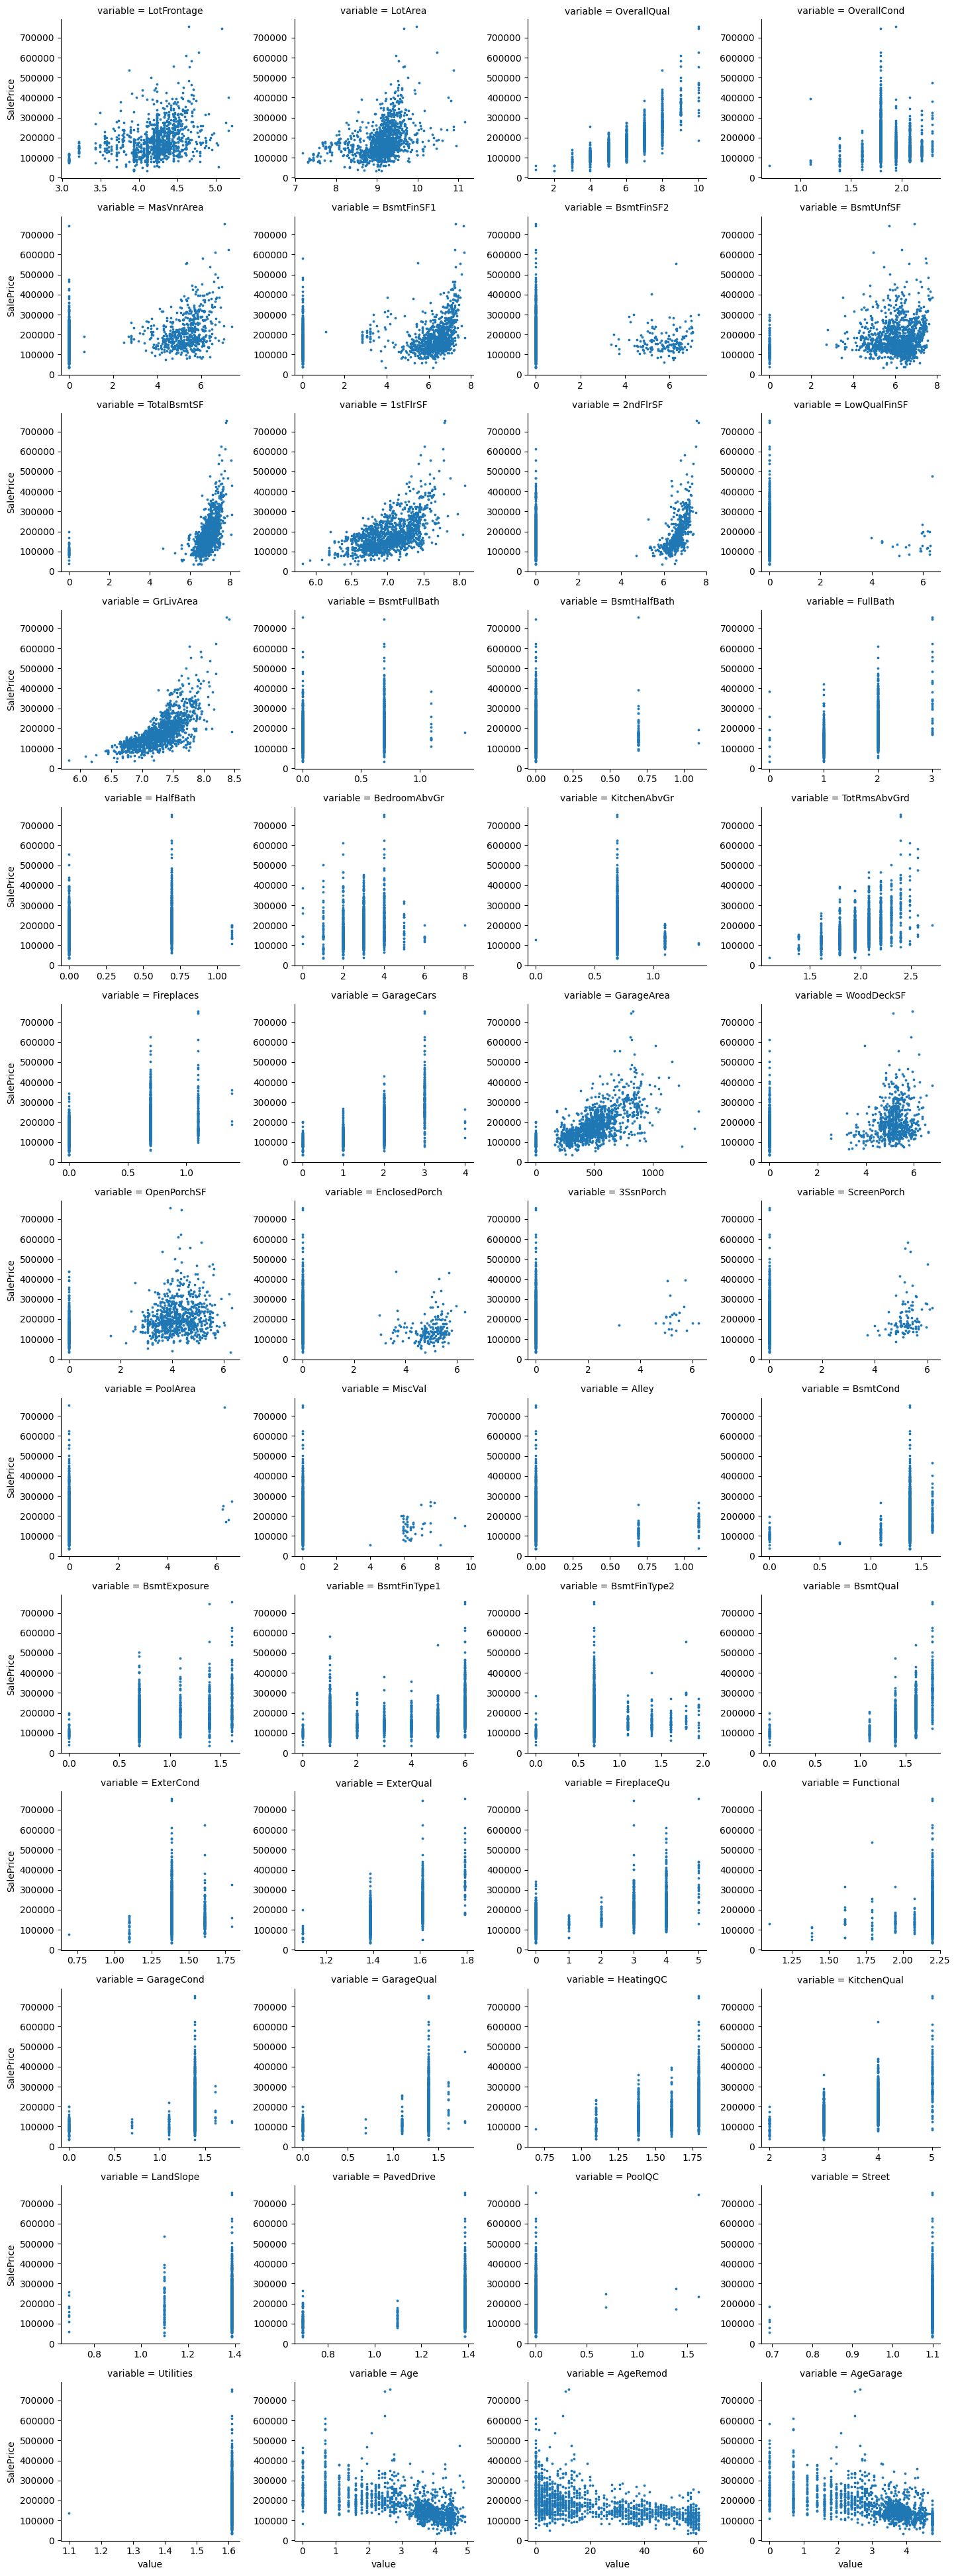

In [16]:
temp = pd.melt(df, id_vars=['SalePrice'], value_vars=quan)

grid = sns.FacetGrid(temp, col="variable", col_wrap=4, height=3.0, 
                     aspect=1.2, sharex=False, sharey=False)

grid.map(plt.scatter, "value", 'SalePrice', s=3)
plt.show()

# DUMMIES

In [17]:
dummy_drop = []
for i in qual:
    dummy_drop += [ i+'_'+str(df[i].unique()[-1]) ]
df = pd.get_dummies(df,columns=qual) 
df = df.drop(dummy_drop,axis=1)

In [18]:
X_train  = df[:-1459].drop(['SalePrice','Id'], axis=1)
y_train  = df[:-1459]['SalePrice']
X_test  = df[-1459:].drop(['SalePrice','Id'], axis=1)
scaler = RobustScaler()
X_train[quan]= scaler.fit_transform(X_train[quan])
X_test[quan]= scaler.transform(X_test[quan])
X_train.shape, X_test.shape

((1454, 220), (1459, 220))

# USING ALGOS

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
model_reg = lin_reg.fit(X_train, y_train)
y1_pred = lin_reg.predict(X_train)
train_score = lin_reg.score(X_train, y_train)
print("R^2 score for the training set:", train_score)

R^2 score for the training set: 0.8743608197141954


In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_knn_pred = knn_reg.predict(X_train)
knn_train_score = knn_reg.score(X_train, y_train)
print("KNN R^2 score for the training set:", knn_train_score)

KNN R^2 score for the training set: 0.8591401360006421


In [31]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_tree_pred = tree_reg.predict(X_train)
tree_train_score = tree_reg.score(X_train, y_train)
print("Decision Tree R^2 score for the training set:", tree_train_score)

Decision Tree R^2 score for the training set: 0.9999969227678451


In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_forest_pred = forest_reg.predict(X_train)
forest_train_score = forest_reg.score(X_train, y_train)
print("Random Forest R^2 score for the training set:", forest_train_score)

Random Forest R^2 score for the training set: 0.9829278811011938


In [34]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_reg_pred = svr_reg.predict(X_train)
svr_score = svr_reg.score(X_train, y_train)
print("SVR  R^2 score for the training set:", svr_score)

SVR  R^2 score for the training set: -0.04792128459077527


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X_train, y_train)
y_gbr_pred = gbr_reg.predict(X_train)
gbr_train_score = gbr_reg.score(X_train, y_train)
print("Gradient Boosting R^2 score for the training set:", gbr_train_score)

Gradient Boosting R^2 score for the training set: 0.9669443527041275


# DECISION TREE IS THE WINNER